#Diamonds dataSet Linear Regression
#Santiago Javiar Vivas Piamba
#HPC / TERCER CORTE

In [8]:
#Se importan las bibliotecas necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [9]:
#Se carga el dataSet diamondsHPC, para hacer el EDA, a ser usado por el modelo de sklearn, y su correspondiente comparación.

d_diamonds = pd.read_csv("/content/diamondsHPC.csv", sep = ",", )
d_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,0,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,0,2,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,2,0,63.3,58.0,335,4.34,4.35,2.75


**EDA del dataframe diamondsHPC**

In [4]:
#Se presenta la información general sobre el dataFrame
d_diamonds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53939 entries, 0 to 53938
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.23    53939 non-null  float64
 1   0       53939 non-null  int64  
 2   0.1     53939 non-null  int64  
 3   0.2     53939 non-null  int64  
 4   61.5    53939 non-null  float64
 5   55.0    53939 non-null  float64
 6   326     53939 non-null  int64  
 7   3.95    53939 non-null  float64
 8   3.98    53939 non-null  float64
 9   2.43    53939 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


Se observa que no hay valores nulos en el dataSet, no es necesario hacerle cambios.

In [10]:
#Presentación del resumen estadístico del dataFrame
d_diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,1.228940,3.174416,2.256136,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.265976,2.050156,1.766539,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,1.000000,1.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,1.000000,4.000000,2.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,5.000000,3.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


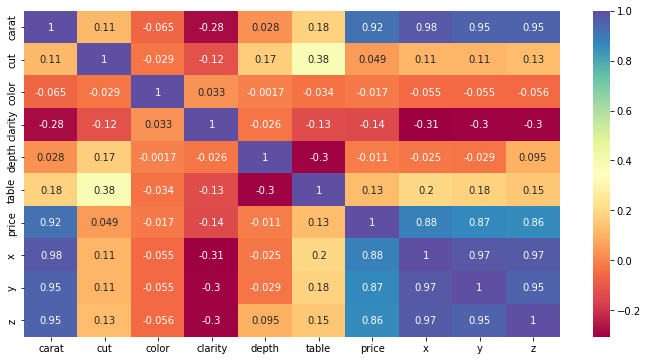

In [11]:
#Se presenta la matriz de correlación.
matCorr = d_diamonds.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(matCorr, annot=True, cmap="Spectral")
plt.show()

Se observa que la variable independiente carat (equvalente al peso del diamante). Tiene la correlación más alta con la variable dependiente preccio (el costo del diamante). La relación es directamente proporcional y se espera que tenga un peso muy alto en el modelo de regresión linear. Adicionalmente se observa que la variable depth (porcentaje total de profundidad) tiene poca relación con la variable de precio. Sin embargo, las variables x, y, z (longitud, ancho y profundidad correspondientemente) tienen una relación directamente proporcional de un peso elevado.

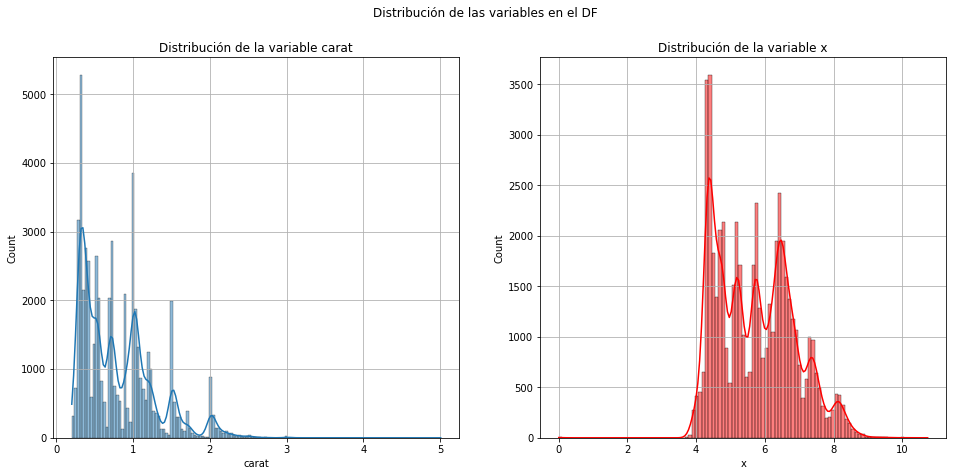

In [12]:
#Se pinta la distribución de las variables. Se espera que la distribución de las variables sea normal Gaussiana.
#Se pintaran dos variables.

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
plt.suptitle("Distribución de las variables en el DF")
sns.histplot(d_diamonds['carat'], ax=axes[0], kde = True)
sns.histplot(d_diamonds['x'], ax=axes[1], kde = True, color='r')

axes[0].set_title("Distribución de la variable carat")
axes[1].set_title("Distribución de la variable x")

axes[0].grid()
axes[1].grid()

plt.show()

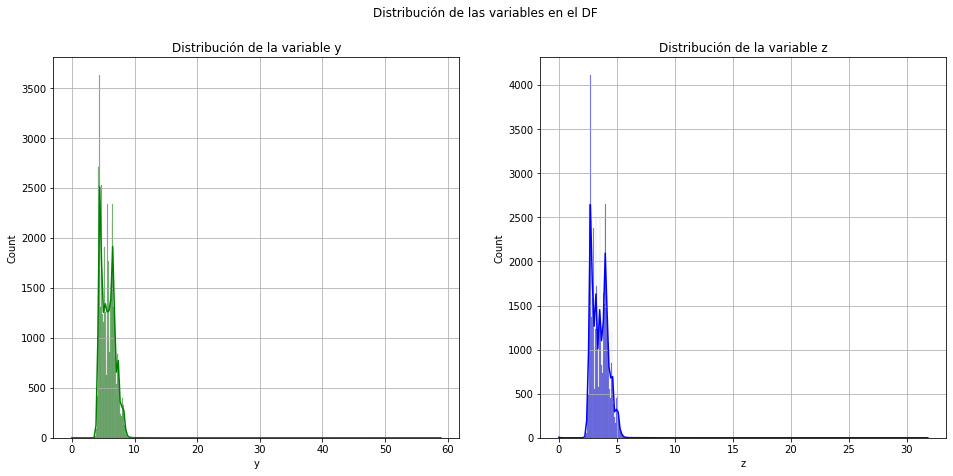

In [13]:
#Se pinta la distribución de las variables. Se espera que la distribución de las variables sea normal Gaussiana.
#Se pintaran dos variables.

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
plt.suptitle("Distribución de las variables en el DF")
axes[0].set_title("Distribución de la variable y")
axes[1].set_title("Distribución de la variable z")
sns.histplot(d_diamonds['y'], ax=axes[0], kde = True, color='g')
sns.histplot(d_diamonds['z'], ax=axes[1], kde = True, color='b')
axes[0].grid()
axes[1].grid()
plt.show()

La distribución de las variables parece ser semi-normal.

In [14]:
#Se separan los datos en 2 conjuntos: variables dependientes y variables independientes.
X = d_diamonds.drop(['price'], axis = 1)
y = d_diamonds['price']

In [15]:
#Se divinen los grupos anteriores en entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [16]:
#Se hace uso de la actualización de sklearn para los modelos de predicción
pipe = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression())])

In [17]:
#Se entrena el modelo para el conjunto de datos de entrenamiento.
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('LR', LinearRegression())])

In [18]:
#Se crea la variable de predicción de entrenamiento en SKLearn.
y_train_hatSk = pipe.predict(X_train)

In [19]:
print (y_train.count())

43152


In [20]:
#Se evalua que tan bueno es nuestro modelo, a partir de la métrica de rendimiento R2_score.
# Tanto para el modelo de cpp como para el de sklearn 
R2_sk = r2_score(y_train, y_train_hatSk)
#R2_cpp = r2_score(y_train, y_train_hatCPP)

#print("Métrica R2_score del modelo Cpp: ", R2_cpp)
print("Métrica R2_score del modelo Sklearn: ", R2_sk)

Métrica R2_score del modelo Sklearn:  0.8725278017323457


In [21]:

y_test_hatSk = pipe.predict(X_test)
R2_sk1 = r2_score(y_test, y_test_hatSk)
print(R2_sk1)



0.8765656125082539
